# Implementation of Decision Tree Regression algorithm on data about different employees within a company and their hierarchy and their salary.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [3]:
rcParams['figure.figsize'] = 10, 10

In [4]:
# This will give us a good resolution for our visualization
%config InlineBackend.figure_format = 'retina' 

In [5]:
# Importing the dataset and displaying it
dtr = pd.read_csv('C:\\Users\\rishi\\Desktop\\Fall 2018\\Udemy\\Machine Learning\\Decision Tree Regression\\Decision_Tree_Regression\\Position_Salaries.csv')
dtr

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
x = dtr.iloc[:, 1:2].values
y = dtr.iloc[:, 2:3].values

In [7]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [8]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## Here we are importing the Decision Tree Regression modle from our scikit learn library and fitting it into our dataframe.

In [9]:
from sklearn.tree import DecisionTreeRegressor
decision = DecisionTreeRegressor(random_state = 0)
decision.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

## As we predict the new salaries of a new potential employee to be hired and try to estimate what his / her salary might be.
## We get a range of salaries which are averaged between a certain level of experience.
## therefore if the new employee has 4.6 years to 5.5 years of experience then his/her salary predicted by out model will be $110,000.


## 4.6 <= 110,000 <= 5.5
## 5.6 <= 150,000 <= 6.5
## 6.6 <= 200,000 <= 7.5 and so on ......


In [10]:
y_pred = decision.predict(6.6)

In [11]:
y_pred

array([ 200000.])

## Below we try and plot our prediction using a scatter plot.

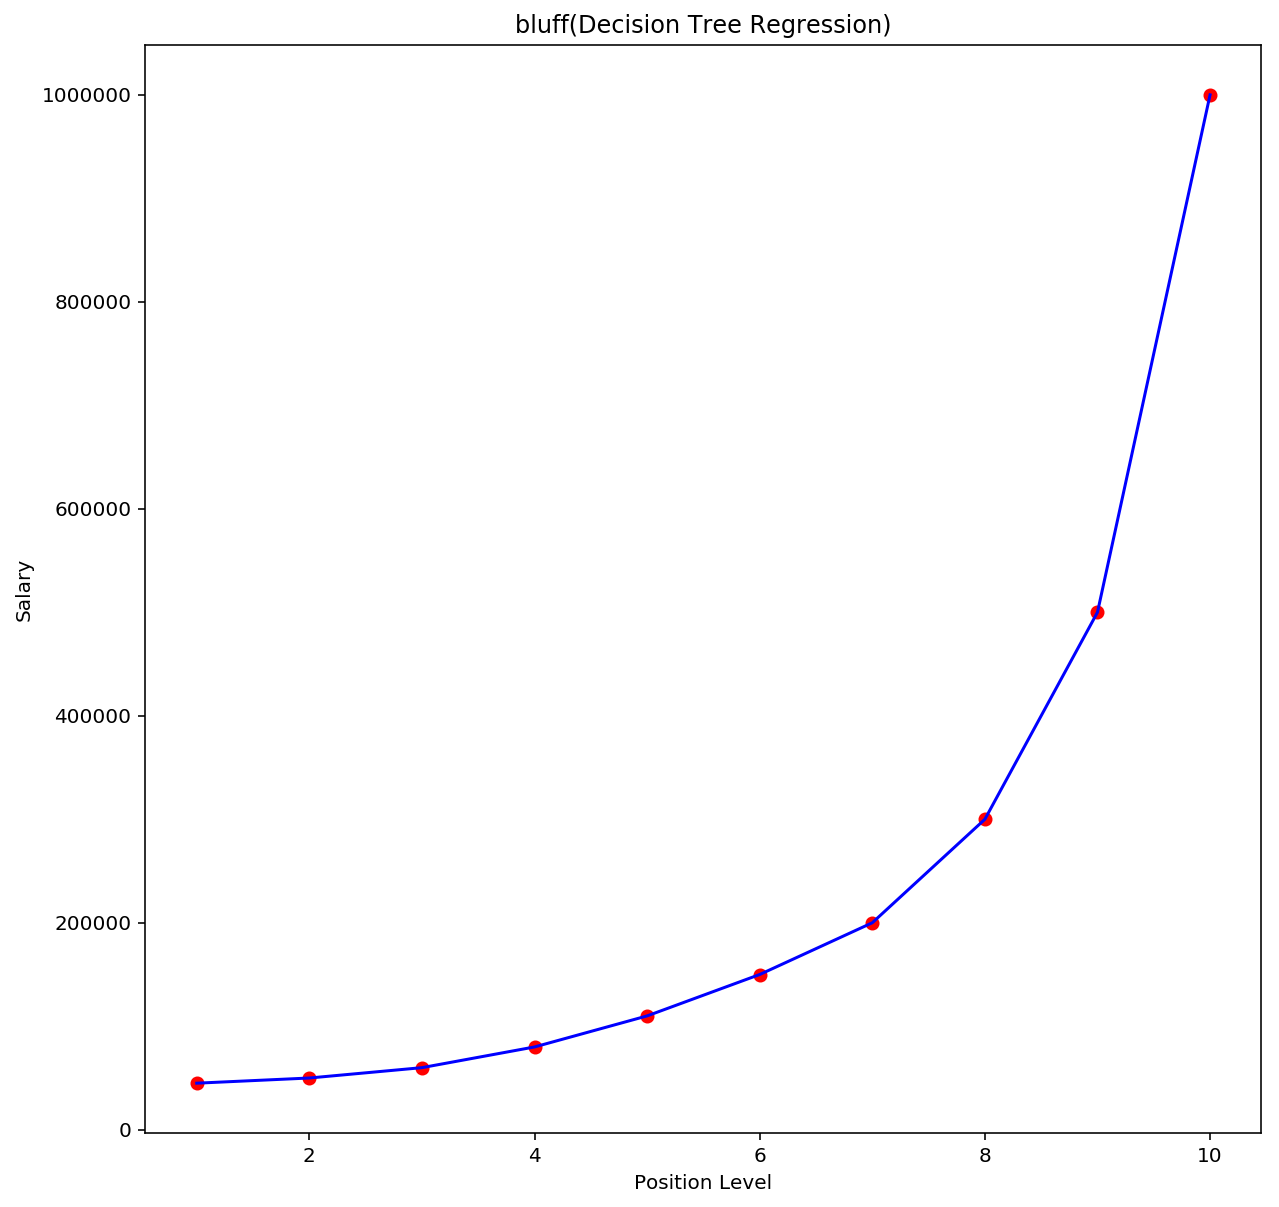

In [12]:
# visualising the Decision Tree Regression
plt.scatter(x, y, color='red')
plt.plot(x, decision.predict(x), color='blue')
plt.title("bluff(Decision Tree Regression)")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### We observe that the graph is increasing which means the more the number of experience the more the salary.
### Which is true but does not give us a good model to estimate a new hire.
### Hence, we will try to be more precise and smothen our graph and plot in high resolution to see the actual results which will give some inference.

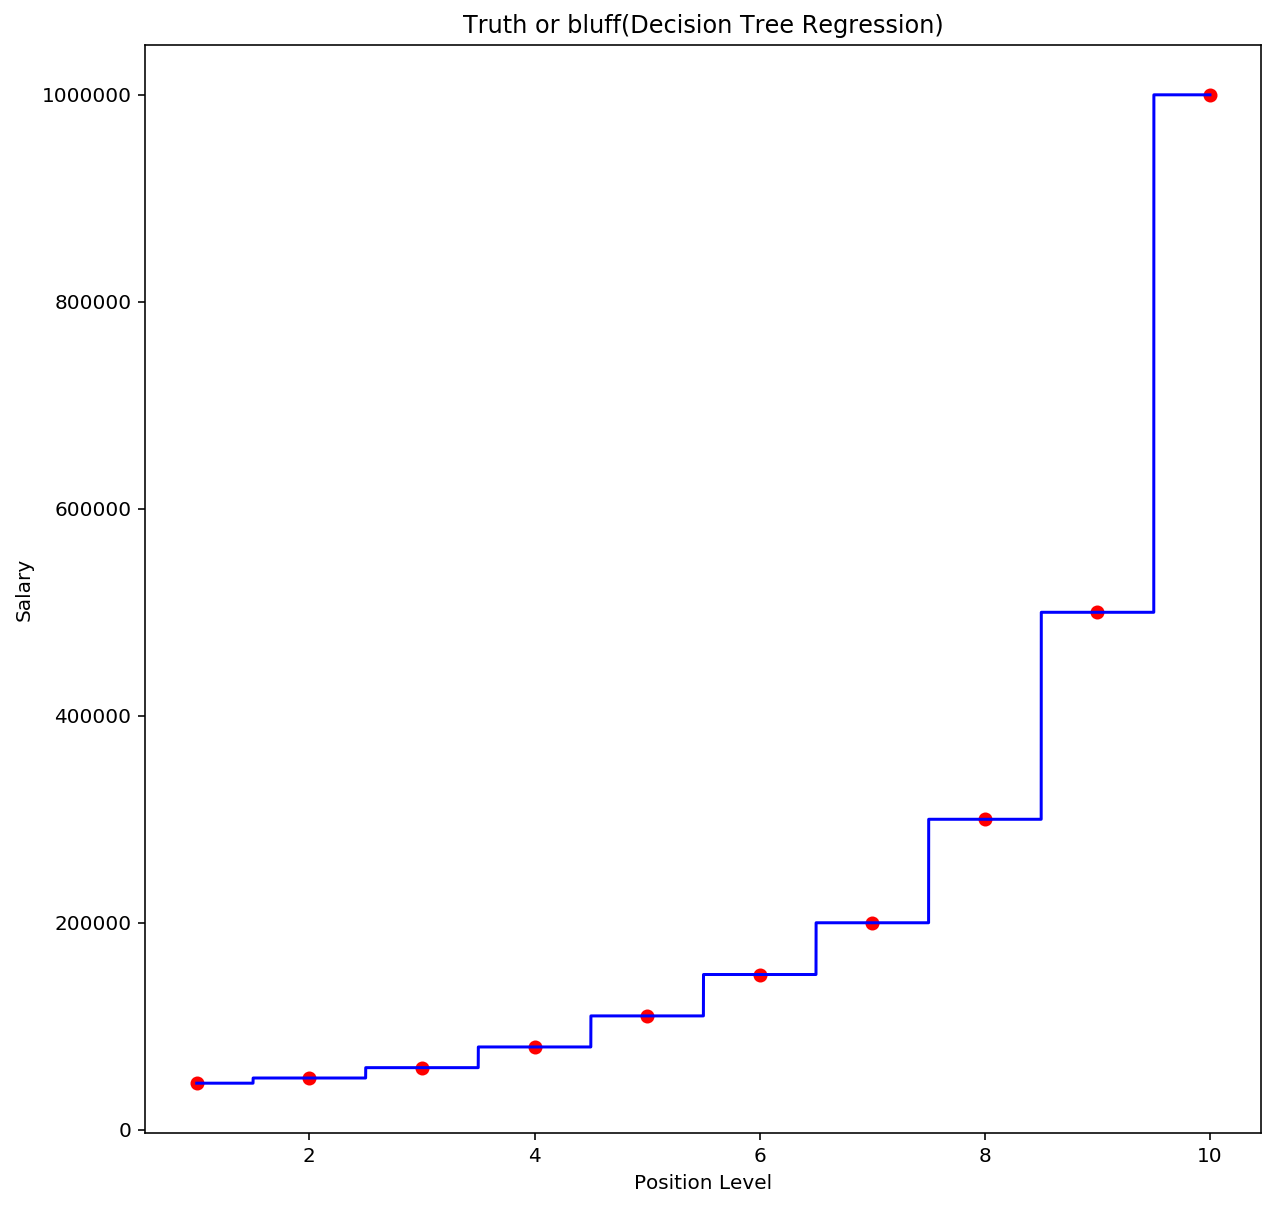

In [13]:
# visualising the Decision Tree Regression results for higher resolution and smoother curve
x_grid = np.arange(min(x), max(x), 0.001)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color='red')
plt.plot(x_grid, decision.predict(x_grid), color='blue')
plt.title("Truth or bluff(Decision Tree Regression)")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#### Now, we can clearly make a good prediction about the salary of the new hire according to the range of work experience he/she has.